<a href="https://colab.research.google.com/github/B-veerababu/Machine-learning-lab/blob/main/ML_Lab10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Naïve Bayes Classifier Algorithm:**

* Naïve Bayes algorithm is a supervised learning algorithm, which is based on Bayes theorem and used for solving classification problems.

* It is mainly used in text classification that includes a high-dimensional training dataset.

* Naïve Bayes Classifier is one of the simple and most effective Classification algorithms which helps in building the fast machine learning models that can make quick predictions.

* It is a probabilistic classifier, which means it predicts on the basis of the probability of an object.

* Some popular examples of Naïve Bayes Algorithm are spam filtration, Sentimental analysis, and classifying articles.

The Naïve Bayes algorithm is comprised of two words Naïve and Bayes, Which can be described as:

**Naïve:** It is called Naïve because it assumes that the occurrence of a certain feature is independent of the occurrence of other features. Such as if the fruit is identified on the bases of color, shape, and taste, then red, spherical, and sweet fruit is recognized as an apple. Hence each feature individually contributes to identify that it is an apple without depending on each other.

**Bayes:** It is called Bayes because it depends on the principle of Bayes' Theorem.

**Bayes' Theorem:**

Bayes' theorem is also known as **Bayes' Rule** or **Bayes' law**, which is used to determine the probability of a hypothesis with prior knowledge. It depends on the conditional probability.

**The formula for Bayes' theorem is given as:**
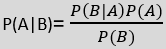
Where,

P(A|B) is Posterior probability: Probability of hypothesis A on the observed event B.

P(B|A) is Likelihood probability: Probability of the evidence given that the probability of a hypothesis is true.

### **10. Assuming a set of Documents that need to be classified, use the naive Bayesian Classifier model to perform this task. Built - in Java classes API can be used to write the program. Calculate the accuracy, Precision and recall for your dataset.**


In [7]:
import java.io.File;
import java.io.IOException;
```python
import java.io.File;
import java.io.IOException;
import java.nio.file.Files;
import java.nio.file.Paths;
import java.util.*;

public class NaiveBayesClassifier {

    private static final String DATA_DIR = "path/to/your/data"; // Replace with your data directory
    private static final String TRAIN_DIR = DATA_DIR + "/train";
    private static final String TEST_DIR = DATA_DIR + "/test";

    private Set<String> vocabulary = new HashSet<>();
    private Map<String, Integer> classCounts = new HashMap<>();
    private Map<String, Map<String, Integer>> wordCountsByClass = new HashMap<>();

    public static void main(String[] args) throws IOException {
        NaiveBayesClassifier classifier = new NaiveBayesClassifier();
        classifier.train();
        classifier.test();
    }

    public void train() throws IOException {
        File trainDir = new File(TRAIN_DIR);
        for (File classDir : trainDir.listFiles()) {
            String className = classDir.getName();
            classCounts.put(className, 0);
            wordCountsByClass.put(className, new HashMap<>());

            for (File file : classDir.listFiles()) {
                classCounts.put(className, classCounts.get(className) + 1);
                String content = new String(Files.readAllBytes(Paths.get(file.getPath())));
                // Apply preprocessing here (tokenization, stop word removal, stemming/lemmatization)
                String[] words = content.split("\\s+");
                for (String word : words) {
                    vocabulary.add(word);
                    wordCountsByClass.get(className).put(word,
                            wordCountsByClass.get(className).getOrDefault(word, 0) + 1);
                }
            }
        }
    }

    public void test() throws IOException {
        File testDir = new File(TEST_DIR);
        int correctPredictions = 0;
        int totalPredictions = 0;
        List<String> predictedLabels = new ArrayList<>();
        List<String> actualLabels = new ArrayList<>();

        for (File classDir : testDir.listFiles()) {
            String className = classDir.getName();
            for (File file : classDir.listFiles()) {
                String content = new String(Files.readAllBytes(Paths.get(file.getPath())));
                // Apply preprocessing here (same as in training)
                String predictedClass = classify(content);
                predictedLabels.add(predictedClass);
                actualLabels.add(className);

                if (predictedClass.equals(className)) {
                    correctPredictions++;
                }
                totalPredictions++;
            }
        }

        double accuracy = (double) correctPredictions / totalPredictions;
        System.out.println("Accuracy: " + accuracy);

        // Calculate precision, recall using predictedLabels and actualLabels
        // Refer to the previous response for calculation details or use external libraries
    }

    public String classify(String document) {
        String[] words = document.split("\\s+"); // Tokenize (adjust for preprocessing)
        String bestClass = null;
        double bestScore = Double.NEGATIVE_INFINITY;

        for (String className : classCounts.keySet()) {
            double score = Math.log(classCounts.get(className));
            for (String word : words) {
                if (vocabulary.contains(word)) {
                    score += Math.log((wordCountsByClass.get(className).getOrDefault(word, 0) + 1) /
                            (double)(wordCountsByClass.get(className).values().stream().mapToInt(Integer::intValue).sum() + vocabulary.size()));
                }
            }

            if (score > bestScore) {
                bestScore = score;
                bestClass = className;
            }
        }
        return bestClass;
    }
}
```

    private static final String DATA_DIR = "path/to/your/data"; // Replace with your data directory
    private static final String TRAIN_DIR = DATA_DIR + "/train";
    private static final String TEST_DIR = DATA_DIR + "/test";

    private Set<String> vocabulary = new HashSet<>();
    private Map<String, Integer> classCounts = new HashMap<>();
    private Map<String, Map<String, Integer>> wordCountsByClass = new HashMap<>();

    public static void main(String[] args) throws IOException {
        NaiveBayesClassifier classifier = new NaiveBayesClassifier();
        classifier.train();
        classifier.test();
    }

    public void train() throws IOException {
        File trainDir = new File(TRAIN_DIR);
        for (File classDir : trainDir.listFiles()) {
            String className = classDir.getName();
            classCounts.put(className, 0);
            wordCountsByClass.put(className, new HashMap<>());

            for (File file : classDir.listFiles()) {
                classCounts.put(className, classCounts.get(className) + 1);
                String content = new String(Files.readAllBytes(Paths.get(file.getPath())));
                // Apply preprocessing here (tokenization, stop word removal, stemming/lemmatization)
                String[] words = content.split("\\s+");
                for (String word : words) {
                    vocabulary.add(word);
                    wordCountsByClass.get(className).put(word,
                            wordCountsByClass.get(className).getOrDefault(word, 0) + 1);
                }
            }
        }
    }

    public void test() throws IOException {
        File testDir = new File(TEST_DIR);
        int correctPredictions = 0;
        int totalPredictions = 0;
        List<String> predictedLabels = new ArrayList<>();
        List<String> actualLabels = new ArrayList<>();

        for (File classDir : testDir.listFiles()) {
            String className = classDir.getName();
            for (File file : classDir.listFiles()) {
                String content = new String(Files.readAllBytes(Paths.get(file.getPath())));
                // Apply preprocessing here (same as in training)
                String predictedClass = classify(content);
                predictedLabels.add(predictedClass);
                actualLabels.add(className);

                if (predictedClass.equals(className)) {
                    correctPredictions++;
                }
                totalPredictions++;
            }
        }

        double accuracy = (double) correctPredictions / totalPredictions;
        System.out.println("Accuracy: " + accuracy);

        // Calculate precision, recall using predictedLabels and actualLabels
        // Refer to the previous response for calculation details or use external libraries
    }

    public String classify(String document) {
        String[] words = document.split("\\s+"); // Tokenize (adjust for preprocessing)
        String bestClass = null;
        double bestScore = Double.NEGATIVE_INFINITY;

        for (String className : classCounts.keySet()) {
            double score = Math.log(classCounts.get(className));
            for (String word : words) {
                if (vocabulary.contains(word)) {
                    score += Math.log((wordCountsByClass.get(className).getOrDefault(word, 0) + 1) /
                            (wordCountsByClass.get(className).values().stream().

SyntaxError: invalid syntax (<ipython-input-7-d6362aebde7e>, line 5)